In [4]:
def calculate_y_before_rotation(x_before, z_before, x_after, z_after):
    return -x_after


x_before = 1
z_before = 1
x_after = 1
z_after = 1


y_before_calculated = calculate_y_before_rotation(x_before, z_before, x_after, z_after)

print("Calculated y_before:", y_before_calculated)


Original 3D Coordinates: [1.00000000e+00 6.83580866e-17 1.00000000e+00]


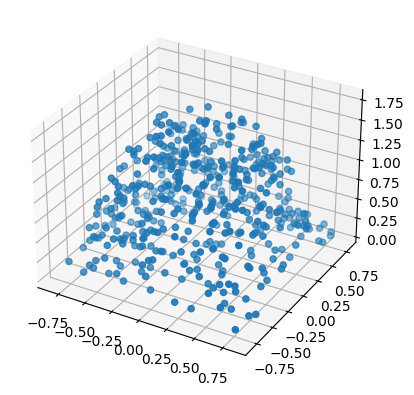

In [8]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("points.json", "r") as f:
    points = json.load(f)

x = [point[0] for point in points]
y = [point[1] for point in points]
z = [point[2] for point in points]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)


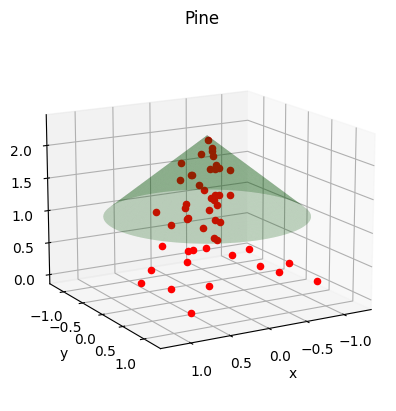

In [80]:
import mpl_toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x, y, height):
    return np.sqrt(x ** 2 + y ** 2) - height


base_radius = 1.2
height = 2.3
num_points = 50
tolerance = 1e-5

fig = plt.figure()
ax = plt.axes(projection='3d')

u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]

x = base_radius * np.cos(u)*np.sin(v)
y = base_radius * np.sin(u)*np.sin(v)
z = -f(x, y, height)
ax.plot_surface(x, y, z, color='green', alpha=0.125)

valid_points = []
while len(valid_points) < num_points:

    z = np.random.uniform(0, height)

    r = base_radius * (1 - z/height)

    x = np.random.uniform(-r, r)
    y = np.random.uniform(-r, r)

    
    valid_points.append((x, y, z))


for point in valid_points:
    ax.scatter3D(*point, color='red')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Pine')

ax.view_init(elev=15, azim=60)

plt.show()


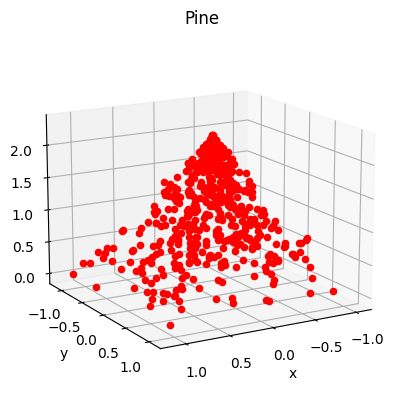

In [99]:
import mpl_toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os 

base_radius = 1.2
height = 2.3
num_points = 500

file_name = "points3.json"

fig = plt.figure()
ax = plt.axes(projection='3d')
regenerate = True
points = []

if os.path.exists(file_name):
    print("reading")
    with open(file_name, "r") as f:
        points = json.load(f)
else:
    while len(points) < num_points:

        z = np.random.uniform(0, height)

        r = base_radius * (1 - z/height)

        x = np.random.uniform(-r, r)
        y = np.random.uniform(-r, r)

        
        points.append((x, y, z))

    with open(file_name, "w") as f:
        json.dump(points, f, indent=4)

for point in points:
    ax.scatter3D(*point, color='red')


ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Pine')

ax.view_init(elev=15, azim=60)

plt.show()


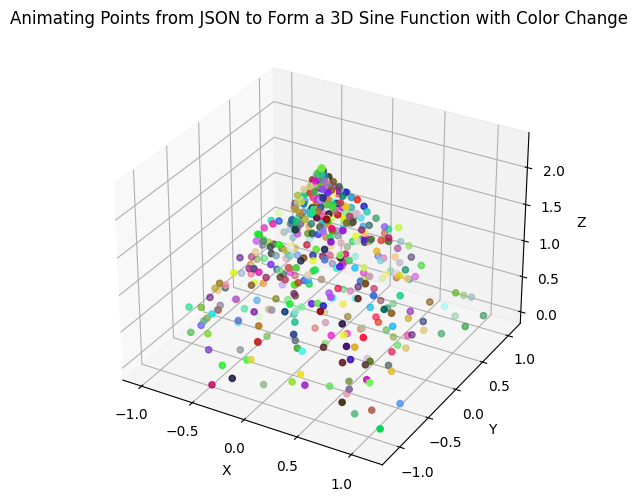

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import json
from matplotlib import animation

with open('points3.json') as f:
    point_data = json.load(f)
    
points = np.array(point_data)

x = points[:, 0] 
y = points[:, 1] 
z = points[:, 2]  
colors = np.random.rand(len(x), 3) 

amplitude = 5
frequency = 2
phase = 0

def update_points(i, points, colors):
    time = i / frequency
    new_z = amplitude * np.sin(2 * np.pi * time + phase)

    points[:, 2] = new_z

    colors[:, 0] = 1 - abs(new_z) / amplitude  
    colors[:, 1] = abs(new_z) / amplitude  
    colors[:, 2] = 0  

    return points, colors

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

data = np.array([x, y, z]).T
points = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Animating Points from JSON to Form a 3D Sine Function with Color Change')

ani = animation.FuncAnimation(fig, update_points, fargs=(points, colors), frames=200, interval=10)

plt.show()


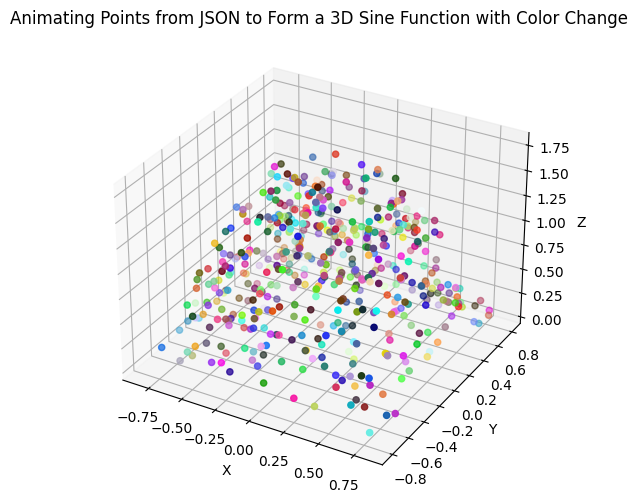

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import json
from matplotlib import animation

with open('points.json') as f:
    point_data = json.load(f)

points = np.array(point_data)

x = points[:, 0]  
y = points[:, 1]  
z = points[:, 2]  
colors = np.random.rand(len(x), 3)

amplitude = 5
frequency = 2
phase = 0

def update_points(i, points, colors):
    time = i / frequency
    new_z = amplitude * np.sin(2 * np.pi * time + phase)

    points[:, 2] = new_z

    colors[:, 0] = 1 - abs(new_z) / amplitude
    colors[:, 1] = abs(new_z) / amplitude 
    colors[:, 2] = 0  

    return points, colors


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

data = np.array([x, y, z]).T
points = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Animating Points from JSON to Form a 3D Sine Function with Color Change')

ani = animation.FuncAnimation(fig, update_points, fargs=(points, colors), frames=200, interval=10)

plt.show()


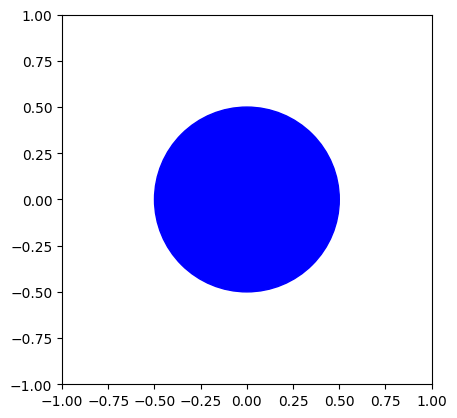

In [108]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Define ball parameters
ball_radius = 0.5
ball_position = np.array([0, 0])  # Initial ball position
ball_velocity = np.array([2, 1])  # Initial ball velocity

# Define animation function to update ball position and velocity
def animate(i):
    # Update ball position based on velocity
    ball_position += ball_velocity

    # Check for wall collisions and update velocity accordingly
    if ball_position[0] + ball_radius >= 1 or ball_position[0] - ball_radius <= -1:
        ball_velocity[0] *= -1
    if ball_position[1] + ball_radius >= 1 or ball_position[1] - ball_radius <= -1:
        ball_velocity[1] *= -1

    # Draw the ball at the updated position
    circle = plt.Circle(ball_position, ball_radius, color='blue')
    ax.clear()
    ax.add_patch(circle)
    ax.set_aspect('equal')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

    return circle,

# Create the figure and axes
fig, ax = plt.subplots()

# Create the initial circle representing the ball
circle = plt.Circle(ball_position, ball_radius, color='blue')
ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Create the animation object and set animation parameters
ani = FuncAnimation(fig, animate, frames=200, interval=10)

# Show the animation
plt.show()
